In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'C:\Users\HP\Desktop\RatingsPredictionData.xlsx')
df.head()

,Unnamed: 0,Rating,Review_Summary,Full_Review,Product_Name
0,0,5,Mind-blowing purchase,Pros :-\nRyzen 5 (5600h) beast 😍\nDisplay is a...,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...
1,1,4,Wonderful,I have used this laptop for one week and my ob...,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...
2,2,5,Simply awesome,If you're looking for a best budget gaming lap...,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...
3,3,5,Best in the market!,No compromise in performance and the thermals ...,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...
4,4,5,Mind-blowing purchase,1)Trust me guys this is awesome Laptop 💻 in bu...,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...


In [3]:
df.drop({'Unnamed: 0'},axis=1,inplace=True)

In [4]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Review_Summary']=LE.fit_transform(df['Review_Summary'])
df['Product_Name']=LE.fit_transform(df['Product_Name'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61964 entries, 0 to 61963
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rating          61964 non-null  int64 
 1   Review_Summary  61964 non-null  int32 
 2   Full_Review     61964 non-null  object
 3   Product_Name    61964 non-null  int32 
dtypes: int32(2), int64(1), object(1)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Rating,Review_Summary,Product_Name
count,61964.000000,61964.000000,61964.000000
mean,4.701682,28.603286,13.776354
std,0.536194,15.805241,9.005206
min,3.000000,0.000000,0.000000
25%,4.000000,15.000000,4.000000
50%,5.000000,30.000000,16.000000
75%,5.000000,42.000000,22.000000
max,5.000000,54.000000,26.000000


In [7]:
df.isnull().sum()

Rating            0
Review_Summary    0
Full_Review       0
Product_Name      0
dtype: int64

In [8]:
df.corr() # Correlation

,Rating,Review_Summary,Product_Name
Rating,1.000000,-0.053886,-0.065500
Review_Summary,-0.053886,1.000000,0.000187
Product_Name,-0.065500,0.000187,1.000000


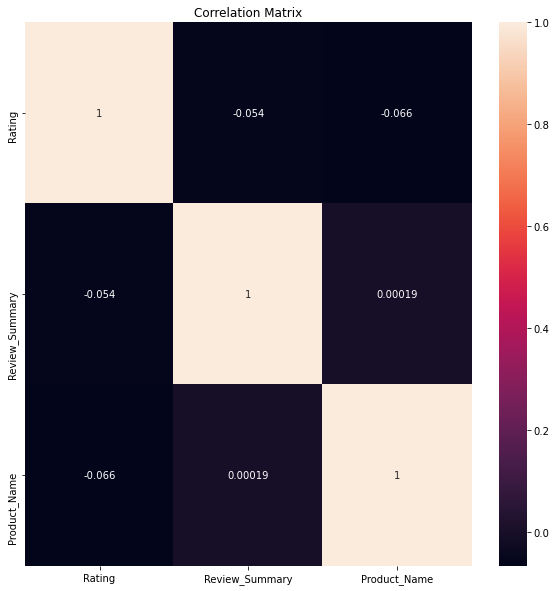

In [9]:
# Correlation Matrix
corr_mat=df.corr()
# Size of the canvas
plt.figure(figsize=[10,10])
#Plot Correlation Matrix
sns.heatmap(corr_mat,annot=True) # annot represnts each value encoded in heatmap
plt.title('Correlation Matrix')
plt.show()

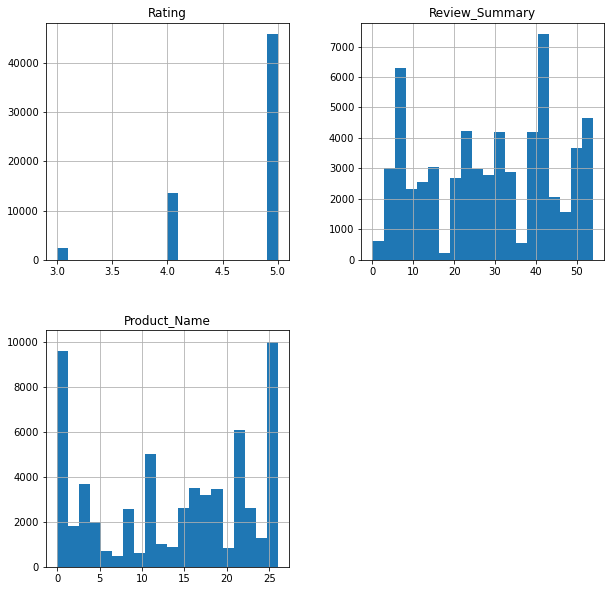

In [10]:
# plot histogram data vizualization
df.hist(bins=20,figsize=(10,10))
#plot showing
plt.show()

In [11]:
# Checking Skweness
df.skew().sort_values(ascending=False) # For descending 

Review_Summary   -0.116993
Product_Name     -0.207581
Rating           -1.615273
dtype: float64

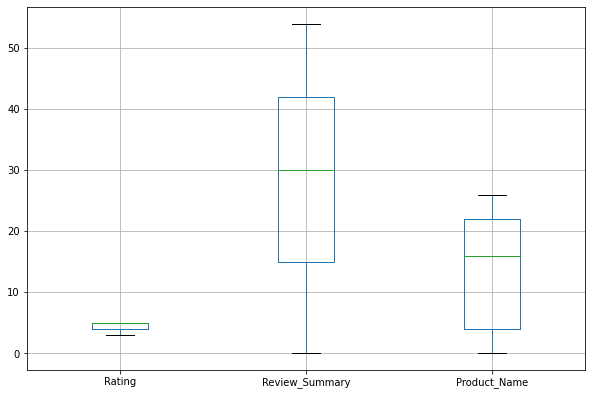

In [12]:
# Checking Outliers in data
# Plot boxplot
df.boxplot(figsize=[10,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [13]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
import string

In [14]:
df['length'] = df['Full_Review'].str.len()
df.head()

,Rating,Review_Summary,Full_Review,Product_Name,length
0,5,32,Pros :-\nRyzen 5 (5600h) beast 😍\nDisplay is a...,9,505
1,4,51,I have used this laptop for one week and my ob...,9,507
2,5,42,If you're looking for a best budget gaming lap...,9,404
3,5,6,No compromise in performance and the thermals ...,9,415
4,5,32,1)Trust me guys this is awesome Laptop 💻 in bu...,9,474


In [15]:
# Convert all messages to lower case
df['Full_Review'] = df['Full_Review'].str.lower()

# Replace email addresses with 'email'
df['Full_Review'] = df['Full_Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['Full_Review'] = df['Full_Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['Full_Review'] = df['Full_Review'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['Full_Review'] = df['Full_Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
    
# Replace numbers with 'numbr'
df['Full_Review'] = df['Full_Review'].str.replace(r'\d+(\.\d+)?', 'numbr')


df['Full_Review'] = df['Full_Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['Full_Review'] = df['Full_Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
df['Full_Review'] = df['Full_Review'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [16]:
df['clean_length'] = df.Full_Review.str.len()
df.head()

,Rating,Review_Summary,Full_Review,Product_Name,length,clean_length
0,5,32,pro :- ryzen numbr (numbrh) beast 😍 display aw...,9,505,449
1,4,51,used laptop one week observation below. numbr....,9,507,405
2,5,42,looking best budget gaming laptop option teste...,9,404,310
3,5,6,compromise performance thermal really good one...,9,415,343
4,5,32,numbr)trust guy awesome laptop 💻 budget value ...,9,474,409


In [17]:
df.length.sum()

18877482

In [18]:
df.clean_length.sum()

14048001

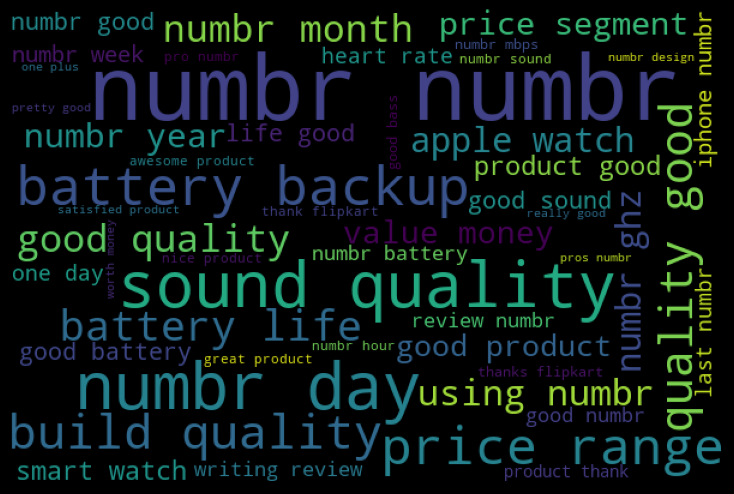

In [19]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = df['Full_Review']
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [21]:
# Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df['Full_Review'])
x = features

In [22]:
df.shape

(61964, 6)

In [23]:
y=df['Rating']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=150,test_size=.30)

In [24]:
y_train.shape,y_test.shape

((43374,), (18590,))

In [25]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 1.0
Test accuracy is 1.0
[[  739     0     0]
 [    0  4011     0]
 [    0     0 13840]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       739
           4       1.00      1.00      1.00      4011
           5       1.00      1.00      1.00     13840

    accuracy                           1.00     18590
   macro avg       1.00      1.00      1.00     18590
weighted avg       1.00      1.00      1.00     18590



In [26]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 1.0
Test accuracy is 1.0
[[  739     0     0]
 [    0  4011     0]
 [    0     0 13840]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       739
           4       1.00      1.00      1.00      4011
           5       1.00      1.00      1.00     13840

    accuracy                           1.00     18590
   macro avg       1.00      1.00      1.00     18590
weighted avg       1.00      1.00      1.00     18590



In [27]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 1.0
Test accuracy is 1.0
[[  739     0     0]
 [    0  4011     0]
 [    0     0 13840]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       739
           4       1.00      1.00      1.00      4011
           5       1.00      1.00      1.00     13840

    accuracy                           1.00     18590
   macro avg       1.00      1.00      1.00     18590
weighted avg       1.00      1.00      1.00     18590



In [28]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.791902983354083
Test accuracy is 0.7963421194190425
[[  739     0     0]
 [    0   473  3538]
 [    0   248 13592]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       739
           4       0.66      0.12      0.20      4011
           5       0.79      0.98      0.88     13840

    accuracy                           0.80     18590
   macro avg       0.82      0.70      0.69     18590
weighted avg       0.77      0.80      0.74     18590



In [29]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9999077788536912
Test accuracy is 0.9997310381925767
[[  739     0     0]
 [    0  4011     0]
 [    0     5 13835]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       739
           4       1.00      1.00      1.00      4011
           5       1.00      1.00      1.00     13840

    accuracy                           1.00     18590
   macro avg       1.00      1.00      1.00     18590
weighted avg       1.00      1.00      1.00     18590



In [30]:
# SVC - Support Vector Classifier
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred_train=svc.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 1.0
Test accuracy is 0.9997310381925767
[[  739     0     0]
 [    0  4011     0]
 [    0     5 13835]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       739
           4       1.00      1.00      1.00      4011
           5       1.00      1.00      1.00     13840

    accuracy                           1.00     18590
   macro avg       1.00      1.00      1.00     18590
weighted avg       1.00      1.00      1.00     18590



In [31]:
# Check Overfitting - Use Cross Validation Score
# Cross Validation
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LG,x,y,cv=5)
print("Cross Validation Score Of Logistic Regression Model :",scr.mean())
scr1=cross_val_score(DT,x,y,cv=5)
print("Cross Validation Score Of Decision Tree Model :",scr1.mean())
scr2=cross_val_score(RF,x,y,cv=5)
print("Cross Validation Score Of Random Forest Model :",scr2.mean())
scr3=cross_val_score(ada,x,y,cv=5)
print("Cross Validation Score Of Adaboost Model :",scr3.mean())
scr4=cross_val_score(knn,x,y,cv=5)
print("Cross Validation Score Of KNeighbors Model :",scr4.mean())
scr5=cross_val_score(svc,x,y,cv=5)
print("Cross Validation Score Of Support Vector Model :",scr5.mean())

Cross Validation Score Of Logistic Regression Model : 0.7762736096518803
Cross Validation Score Of Decision Tree Model : 0.700663463625653
Cross Validation Score Of Random Forest Model : 0.79363811163521
Cross Validation Score Of Adaboost Model : 0.6822667781855027
Cross Validation Score Of KNeighbors Model : 0.6554297387313909
Cross Validation Score Of Support Vector Model : 0.8023044335040549


In [32]:
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
# Create parameters list to pass in GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}

In [33]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train) # fitting the data in model
GCV.best_params_ # Printing the best parameter found by GridSearchCV

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

In [34]:
GCV_pred=GCV.best_estimator_.predict(x_test) # predicting with best parameters
accuracy_score(y_test,GCV_pred) # checking final accuracy

0.8467993544916622

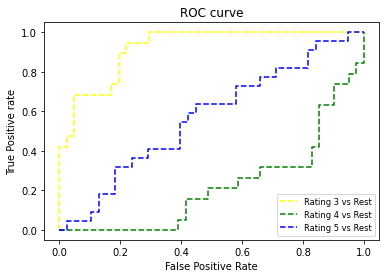

In [36]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate 2 class dataset
x,y = make_classification(n_samples=200, n_classes=3, n_features=5, n_informative=3, random_state=0)
# split into train/test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=150)
# fit model
clf = OneVsRestClassifier(GCV.best_estimator_)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class = 3
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test,x_test[:,i], pos_label=i)
# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='yellow', label='Rating 3 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Rating 4 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Rating 5 vs Rest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right',fontsize='small')
plt.savefig('Multiclass ROC',dpi=500)
plt.show()

In [35]:
# Conclusion:
Attrition=np.array(y_test)
Predicted=np.array(LG.predict(x_test))
df_1=pd.DataFrame({'original':Attrition,'predicted':Predicted},index=range(len(Attrition)))
df_1

,original,predicted
0,4,4
1,4,4
2,5,5
3,5,5
4,5,5
...,...,...
18585,5,5
18586,5,5
18587,5,5
18588,5,5


In [37]:
# Model Saving
import pickle
filename = 'RatingsPrediction.pkl'
pickle.dump(RF,open(filename,'wb'))

# Thank You...!!!